## Setup

In [2]:
from imports import np, pd, plt
from global_variables import *
from load_files import *

## EDA v1

### Info

In [3]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Missing Entries

In [5]:
true.isnull().sum()
# no missing entries in true news dataset

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
fake.isnull().sum()
# no missing entries in fake news dataset.

title      0
text       0
subject    0
date       0
dtype: int64

## Merge data

In [7]:
# Add label column: isfake

true['isfake'] = 0
fake['isfake'] = 1

In [8]:
allnewsdata = pd.concat([true, fake])
allnewsdata = allnewsdata.reset_index(drop=True)

In [9]:
len(allnewsdata) == len(true) + len(fake)

True

## EDA v2

### Info

In [10]:
allnewsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   isfake   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Univariate Analysis

In [11]:
COLUMNS = allnewsdata.columns.values

#### title

In [13]:
# title: object/str (maxlen: 286, minlen: 8)

print(allnewsdata[COLUMNS[0]].dtype)
print(allnewsdata[COLUMNS[0]].str.len().max())
print(allnewsdata[COLUMNS[0]].str.len().min())

object
286
8


In [14]:
allnewsdata[COLUMNS[0]].value_counts()

Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
                                                                                                         ..
PROOF THAT TRUMP WAS DEAD ON: NJ Rooftop Parties Watched And Celebrated On 9/11                           1
Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE                  1
Peru's Fujimori asks for forgiveness, thanks Kuczynski for pardon                                         1
Spanish court orders prison 

#### text

In [15]:
# text: object/str (maxlen: 51794, minlen: 1)

print(allnewsdata[COLUMNS[1]].dtype)
print(allnewsdata[COLUMNS[1]].str.len().max())
print(allnewsdata[COLUMNS[1]].str.len().min())

object
51794
1


In [16]:
allnewsdata[COLUMNS[1]].value_counts().values

array([627,   8,   5, ...,   1,   1,   1], dtype=int64)

#### subject

In [17]:
# subject: object/str (maxlen: 15, minlen: 4)

print(allnewsdata[COLUMNS[2]].dtype)
print(allnewsdata[COLUMNS[2]].str.len().max())
print(allnewsdata[COLUMNS[2]].str.len().min())

object
15
4


In [18]:
allnewsdata[COLUMNS[2]].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

#### date

In [19]:
# date: object/str (maxlen: 149, minlen: 9)

print(allnewsdata[COLUMNS[3]].dtype)
print(allnewsdata[COLUMNS[3]].str.len().max())
print(allnewsdata[COLUMNS[3]].str.len().min())

# data is object type
# TODO: change the date to datetime type

object
149
9


In [20]:
allnewsdata[COLUMNS[3]].value_counts()

December 20, 2017                                                                                                                                    182
December 6, 2017                                                                                                                                     166
November 30, 2017                                                                                                                                    162
November 9, 2017                                                                                                                                     158
October 13, 2017                                                                                                                                     155
                                                                                                                                                    ... 
MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Foots

#### isfake

In [21]:
# isfake: int64 (categorical {0, 1}, where 1 is fake, and 0 otherwise)

print(allnewsdata[COLUMNS[4]].dtype)
print(allnewsdata[COLUMNS[4]].max())
print(allnewsdata[COLUMNS[4]].min())

int64
1
0


In [22]:
allnewsdata.isfake.value_counts()

1    23481
0    21417
Name: isfake, dtype: int64

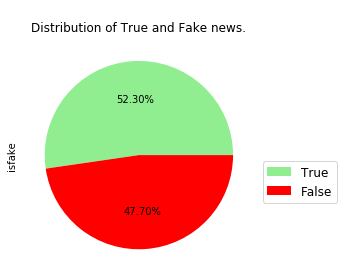

In [23]:
series = allnewsdata.isfake.value_counts()
labels = series.keys()
labels_alt = ['True', 'False']
colors = ['lightgreen', 'red']

ax = series.plot(
    kind='pie',
    autopct='%.2f%%',
    startangle=0,
    colors=colors,
    labels=None)

ax.legend(labels=labels_alt,
          prop={'size': 12},
          bbox_to_anchor=(1, 0.5))

plt.title('\nDistribution of True and Fake news.')
plt.tight_layout()
plt.show()

# Dataset is nearly balanced